#📌 Extracción

Descripción
Para iniciar tu análisis, necesitarás importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

📌 Enlace de la API:
🔗 challenge2-data-science-LATAM/TelecomX_Data.json at main · ingridcristh/challenge2-data-science-LATAM

🔗GitHub - ingridcristh/challenge2-data-science-LATAM

¿Qué debes hacer?
✅ Cargar los datos directamente desde la API utilizando Python.
✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.


In [73]:
import pandas as pd
import requests

# URL del archivo JSON en formato "raw"
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'

# Cargar el contenido JSON desde la URL
response = requests.get(url)
data = response.json()

# Convertir a DataFrame
df = pd.DataFrame(data)

# Mostrar las primeras filas
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [74]:


#  Normalizar datos anidados
df = pd.json_normalize(
    data,
    sep="_"  # Para usar nombres como 'customer_gender' en lugar de jerarquías
)

pd.set_option('display.max_columns', None)  # Mostrar todas las columnas al hacer df.head()
pd.set_option('display.expand_frame_repr', False)  # Evita saltos de línea en la tabla

df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [75]:
#'internet_OnlineSecurity' in df.columns


In [76]:
#for col in df.columns:
   # print(col)

#🔧 Transformación

Descripción

Ahora que has extraído los datos, es fundamental comprender la estructura del dataset y el significado de sus columnas. Esta etapa te ayudará a identificar qué variables son más relevantes para el análisis de evasión de clientes.

📌 Para facilitar este proceso, hemos creado un diccionario de datos con la descripción de cada columna. Aunque no es obligatorio utilizarlo, puede ayudarte a comprender mejor la información disponible.

🔗 Enlace al diccionario y a la API

¿Qué debes hacer?
✅ Explorar las columnas del dataset y verificar sus tipos de datos.
✅ Consultar el diccionario para comprender mejor el significado de las variables.
✅ Identificar las columnas más relevantes para el análisis de evasión.

Diccionario de datos:

columnas mas relevantes

Churn: si el cliente dejó o no la empresa

gender: género (masculino y femenino)

SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años

Partner: si el cliente tiene o no una pareja

Dependents: si el cliente tiene o no dependientes

Contract: tipo de contrato

PaperlessBilling: si el cliente prefiere recibir la factura en línea

PaymentMethod: forma de pago

Charges.Monthly: total de todos los servicios del cliente por mes

Charges.Total: total gastado por el cliente

In [77]:
# Ver estructura general
df.info()

# df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

In [78]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [79]:
# Duplicados por fila completa
df.duplicated().sum()

np.int64(0)

In [80]:
# Revisar valores únicos "problemáticos"
df['account_Charges_Total'].unique()[:10]

array(['593.3', '542.4', '280.85', '1237.85', '267.4', '571.45',
       '7904.25', '5377.8', '340.35', '5957.9'], dtype=object)

In [81]:
# Reemplazar valores vacíos por NaN y convertir a float
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')


In [82]:
# Seleccionar columnas categóricas
cat_cols = df.select_dtypes(include='object').columns



In [83]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

Descripción


Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

📌 Tips:

🔗 Manipulación de strings en pandas: lower, replace, startswith y contains | Alura Cursos Online

In [84]:

import numpy as np
import pandas as pd

# Identificar columnas tipo object
object_cols = df.select_dtypes(include='object').columns

# Limpiar y estandarizar sin cambiar el tipo de dato
for col in object_cols:
    df[col] = df[col].str.strip()            # Eliminar espacios iniciales y finales
    df[col] = df[col].str.lower()            # Convertir a minúsculas
    df[col] = df[col].replace({'': np.nan, ' ': np.nan})  # Reemplazar vacíos y espacios por NaN

# Verificación rápida
print(" Limpieza completada.\n")

print(" Revisión de valores nulos por columna:")
print(df[object_cols].isnull().sum())

print("\n Ejemplo de valores únicos en columnas textuales:")
for col in object_cols[:5]:  # Muestra las primeras 5 por simplicidad
    print(f"{col}: {df[col].unique()[:5]}")

 Limpieza completada.

 Revisión de valores nulos por columna:
customerID                     0
Churn                        224
customer_gender                0
customer_Partner               0
customer_Dependents            0
phone_PhoneService             0
phone_MultipleLines            0
internet_InternetService       0
internet_OnlineSecurity        0
internet_OnlineBackup          0
internet_DeviceProtection      0
internet_TechSupport           0
internet_StreamingTV           0
internet_StreamingMovies       0
account_Contract               0
account_PaperlessBilling       0
account_PaymentMethod          0
dtype: int64

 Ejemplo de valores únicos en columnas textuales:
customerID: ['0002-orfbo' '0003-mknfe' '0004-tlhlj' '0011-igkff' '0013-exchz']
Churn: ['no' 'yes' nan]
customer_gender: ['female' 'male']
customer_Partner: ['yes' 'no']
customer_Dependents: ['yes' 'no']


In [85]:
#eliminar en churn los nan
# Filtrar registros donde Churn no es NaN
df = df[df['Churn'].notna()].copy()

# Confirmar la eliminación
print(f"Cantidad de registros después de filtrar: {len(df)}")
print(f"Valores nulos en 'Churn' después de filtrar: {df['Churn'].isna().sum()}")

# Verificar cuántos NaNs quedan en todo el DataFrame
print("\nConteo de valores nulos por columna después de filtrar:")
print(df.isna().sum())

Cantidad de registros después de filtrar: 7043
Valores nulos en 'Churn' después de filtrar: 0

Conteo de valores nulos por columna después de filtrar:
customerID                    0
Churn                         0
customer_gender               0
customer_SeniorCitizen        0
customer_Partner              0
customer_Dependents           0
customer_tenure               0
phone_PhoneService            0
phone_MultipleLines           0
internet_InternetService      0
internet_OnlineSecurity       0
internet_OnlineBackup         0
internet_DeviceProtection     0
internet_TechSupport          0
internet_StreamingTV          0
internet_StreamingMovies      0
account_Contract              0
account_PaperlessBilling      0
account_PaymentMethod         0
account_Charges_Monthly       0
account_Charges_Total        11
dtype: int64


In [86]:
# Rellenar los NaN en 'account_Charges_Total' con el producto de tenure y monthly charges
df['account_Charges_Total'] = df['account_Charges_Total'].fillna(
    df['customer_tenure'] * df['account_Charges_Monthly']
)

In [87]:
print(f"Valores nulos restantes en 'account_Charges_Total': {df['account_Charges_Total'].isna().sum()}")

Valores nulos restantes en 'account_Charges_Total': 0


In [88]:
# Ver estructura general
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           7043 non-null   object 
 5   customer_Dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   object 
 8   phone_MultipleLines        7043 non-null   object 
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   object 
 11  internet_OnlineBackup      7043 non-null   object 
 12  internet_DeviceProtection  7043 non-null   object 
 13  internet_TechSupport       7043 non-null   object 
 1

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,no,yes,no,yes,yes,no,one year,yes,mailed check,65.6,593.30
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,no,no,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,no,no,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,no,no,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40


Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

📌 Esta columna te ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.

In [89]:
# Crear columna Cuentas_Diarias con redondeo a 2 decimales
df['Cuentas_Diarias'] = (df['account_Charges_Monthly'] / 30).round(2)

# Verificar resultados
print(df[['account_Charges_Monthly', 'Cuentas_Diarias']].head())

   account_Charges_Monthly  Cuentas_Diarias
0                     65.6             2.19
1                     59.9             2.00
2                     73.9             2.46
3                     98.0             3.27
4                     83.9             2.80


In [90]:
# Lista de columnas a tratar
cols = [
    'Churn',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies'
]

# Función de limpieza personalizada
def estandarizar_si_no(valor):
    if pd.isna(valor):
        return np.nan
    valor = str(valor).strip().lower()
    if valor.startswith('no'):
        return 'no'
    elif valor.startswith('yes'):
        return 'yes'
    return valor  # por si queda algún otro valor

# Aplicar la función a cada columna
for col in cols:
    df[col] = df[col].apply(estandarizar_si_no)

# Mostrar valores únicos por columna (verificación rápida)
print("🔎 Valores únicos por columna:")
for col in cols:
    print(f"{col}: {df[col].unique()}")

# Contar NaNs por columna
print("\n Conteo de NaNs por columna:")
print(df[cols].isnull().sum())

🔎 Valores únicos por columna:
Churn: ['no' 'yes']
customer_Partner: ['yes' 'no']
customer_Dependents: ['yes' 'no']
phone_PhoneService: ['yes' 'no']
phone_MultipleLines: ['no' 'yes']
internet_OnlineSecurity: ['no' 'yes']
internet_OnlineBackup: ['yes' 'no']
internet_DeviceProtection: ['no' 'yes']
internet_TechSupport: ['yes' 'no']
internet_StreamingTV: ['yes' 'no']
internet_StreamingMovies: ['no' 'yes']

 Conteo de NaNs por columna:
Churn                        0
customer_Partner             0
customer_Dependents          0
phone_PhoneService           0
phone_MultipleLines          0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
dtype: int64


La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

In [91]:
# Lista de columnas a transformar
columnas_binarias = [
    'Churn',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_PaperlessBilling'
]

# Reemplazar 'yes' por 1 y 'no' por 0
df[columnas_binarias] = df[columnas_binarias].replace({'yes': 1, 'no': 0})


/tmp/ipython-input-91-2667542902.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columnas_binarias] = df[columnas_binarias].replace({'yes': 1, 'no': 0})


In [92]:
# Convertir las columnas binarias a tipo int64
#columnas_binarias = [
  ##  'Churn',
  #  'customer_Partner',
  # 'customer_Dependents',
  #  'phone_PhoneService',
  #  'phone_MultipleLines',
  #  'internet_OnlineSecurity',
  #  'internet_OnlineBackup',
  #  'internet_DeviceProtection',
  #  'internet_TechSupport',
  #  'internet_StreamingTV',
  #  'internet_StreamingMovies',
  #  'account_PaperlessBilling'
#]
#df[columnas_binarias] = df[columnas_binarias].astype('int64')

In [93]:
print(df[columnas_binarias].dtypes)

Churn                        int64
customer_Partner             int64
customer_Dependents          int64
phone_PhoneService           int64
phone_MultipleLines          int64
internet_OnlineSecurity      int64
internet_OnlineBackup        int64
internet_DeviceProtection    int64
internet_TechSupport         int64
internet_StreamingTV         int64
internet_StreamingMovies     int64
account_PaperlessBilling     int64
dtype: object


In [94]:
# Diccionario con los nuevos nombres de columnas
nuevos_nombres = {
    'Churn': 'baja_cliente',
    'customer_gender': 'cliente_genero',
    'customer_SeniorCitizen': 'cli_mayor_65',
    'customer_Partner': 'cli_tiene_pareja',
    'customer_Dependents': 'cl_tiene_hijos',
    'customer_tenure': 'meses_contrato',
    'account_Contract': 'tipo_contrato',
    'account_PaperlessBilling': 'factura_online',
    'account_PaymentMethod': 'metodo_pago',
    'account_Charges_Monthly': 'total_mensual_servicios',
    'account_Charges_Total': 'gasto_total_cliente',
    'phone_PhoneService': 'servicio_telefono',
    'phone_MultipleLines': 'tel_multiples_lineas',
    'internet_OnlineSecurity': 'internet_seguridad_online',
    'internet_OnlineBackup': 'internet_respaldo_online',
    'internet_DeviceProtection': 'internet_proteccion_dispositivo',
    'internet_TechSupport': 'internet_sop_tecnico',
    'internet_StreamingTV': 'internet_streaming_tv',
    'internet_StreamingMovies': 'internet_streaming_pelic',
    'Cuentas_Diarias': 'cuentas_diarias'

}

# Renombrar las columnas
df.rename(columns=nuevos_nombres, inplace=True)

In [95]:
# Reemplazar 'female' por 'femenino' y 'male' por 'masculino' en la columna 'cliente_genero'
df['cliente_genero'] = df['cliente_genero'].replace({
    'female': 'femenino',
    'male': 'masculino'
})

# Verificar los valores únicos luego del reemplazo
print("Valores únicos en 'cliente_genero':")
print(df['cliente_genero'].unique())

Valores únicos en 'cliente_genero':
['femenino' 'masculino']


In [96]:
# Ver estructura general
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customerID                       7043 non-null   object 
 1   baja_cliente                     7043 non-null   int64  
 2   cliente_genero                   7043 non-null   object 
 3   cli_mayor_65                     7043 non-null   int64  
 4   cli_tiene_pareja                 7043 non-null   int64  
 5   cl_tiene_hijos                   7043 non-null   int64  
 6   meses_contrato                   7043 non-null   int64  
 7   servicio_telefono                7043 non-null   int64  
 8   tel_multiples_lineas             7043 non-null   int64  
 9   internet_InternetService         7043 non-null   object 
 10  internet_seguridad_online        7043 non-null   int64  
 11  internet_respaldo_online         7043 non-null   int64  
 12  internet_proteccion_dispo

,customerID,baja_cliente,cliente_genero,cli_mayor_65,cli_tiene_pareja,cl_tiene_hijos,meses_contrato,servicio_telefono,tel_multiples_lineas,internet_InternetService,internet_seguridad_online,internet_respaldo_online,internet_proteccion_dispositivo,internet_sop_tecnico,internet_streaming_tv,internet_streaming_pelic,tipo_contrato,factura_online,metodo_pago,total_mensual_servicios,gasto_total_cliente,cuentas_diarias
0,0002-orfbo,0,femenino,0,1,1,9,1,0,dsl,0,1,0,1,1,0,one year,1,mailed check,65.6,593.30,2.19
1,0003-mknfe,0,masculino,0,0,0,9,1,1,dsl,0,0,0,0,0,1,month-to-month,0,mailed check,59.9,542.40,2.00
2,0004-tlhlj,1,masculino,0,0,0,4,1,0,fiber optic,0,0,1,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.46
3,0011-igkff,1,masculino,1,1,0,13,1,0,fiber optic,0,1,1,0,1,1,month-to-month,1,electronic check,98.0,1237.85,3.27
4,0013-exchz,1,femenino,1,1,0,3,1,0,fiber optic,0,0,0,1,1,0,month-to-month,1,mailed check,83.9,267.40,2.80


In [97]:
# Guardar el DataFrame como archivo CSV
df.to_csv('datos_tratados.csv', index=False)

#📊 Carga y análisis

Descripción
Editar
Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [98]:
# Análisis estadístico básico para variables numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baja_cliente,7043.0,0.265370,0.441561,0.00,0.00,0.00,1.00,1.00
cli_mayor_65,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
cli_tiene_pareja,7043.0,0.483033,0.499748,0.00,0.00,0.00,1.00,1.00
cl_tiene_hijos,7043.0,0.299588,0.458110,0.00,0.00,0.00,1.00,1.00
meses_contrato,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
servicio_telefono,7043.0,0.903166,0.295752,0.00,1.00,1.00,1.00,1.00
tel_multiples_lineas,7043.0,0.421837,0.493888,0.00,0.00,0.00,1.00,1.00
internet_seguridad_online,7043.0,0.286668,0.452237,0.00,0.00,0.00,1.00,1.00
internet_respaldo_online,7043.0,0.344881,0.475363,0.00,0.00,0.00,1.00,1.00
internet_proteccion_dispositivo,7043.0,0.343888,0.475038,0.00,0.00,0.00,1.00,1.00


In [99]:
columnas_numericas = [
    'meses_contrato', 'total_mensual_servicios', 'gasto_total_cliente', 'cuentas_diarias'
]

for col in columnas_numericas:
    print(f" Estadísticas para {col}:")
    print(f" - Media: {df[col].mean():.2f}")
    print(f" - Mediana: {df[col].median():.2f}")
    print(f" - Desviación estándar: {df[col].std():.2f}")
    print(f" - Valor mínimo: {df[col].min():.2f}")
    print(f" - Valor máximo: {df[col].max():.2f}")
    print(f" - Valores únicos: {df[col].nunique()}")
    print("—" * 40)

 Estadísticas para meses_contrato:
 - Media: 32.37
 - Mediana: 29.00
 - Desviación estándar: 24.56
 - Valor mínimo: 0.00
 - Valor máximo: 72.00
 - Valores únicos: 73
————————————————————————————————————————
 Estadísticas para total_mensual_servicios:
 - Media: 64.76
 - Mediana: 70.35
 - Desviación estándar: 30.09
 - Valor mínimo: 18.25
 - Valor máximo: 118.75
 - Valores únicos: 1585
————————————————————————————————————————
 Estadísticas para gasto_total_cliente:
 - Media: 2279.73
 - Mediana: 1394.55
 - Desviación estándar: 2266.79
 - Valor mínimo: 0.00
 - Valor máximo: 8684.80
 - Valores únicos: 6531
————————————————————————————————————————
 Estadísticas para cuentas_diarias:
 - Media: 2.16
 - Mediana: 2.34
 - Desviación estándar: 1.00
 - Valor mínimo: 0.61
 - Valor máximo: 3.96
 - Valores únicos: 321
————————————————————————————————————————


En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

In [100]:
# Conteo de clientes que permanecen (0) y que se dieron de baja (1)
print("Conteo absoluto de clientes:")
print(df['baja_cliente'].value_counts())

print("\nProporción de clientes (%):")
print((df['baja_cliente'].value_counts(normalize=True) * 100).round(2))

Conteo absoluto de clientes:
baja_cliente
0    5174
1    1869
Name: count, dtype: int64

Proporción de clientes (%):
baja_cliente
0    73.46
1    26.54
Name: proportion, dtype: float64


In [101]:
import matplotlib.pyplot as plt

def graficar_pie_binario(df, columna, titulo_legible):
    """
    Genera un gráfico de torta para una variable binaria del DataFrame.

    Parámetros:
    - df: DataFrame
    - columna: str → nombre de la columna binaria
    - titulo_legible: str → cómo querés que aparezca el nombre en el título
    """
    # Conteo de valores
    valores = df[columna].value_counts()
    total = valores.sum()

    # Etiquetas: 0 → SI, 1 → NO
    etiquetas_dict = {0: 'NO', 1: 'SI'}
    etiquetas = [f'{etiquetas_dict[i]} - {valores[i]} casos' for i in valores.index]

    # Colores personalizados (opcional)
    colores = ['#a1d99b', '#fc9272']  # verde claro y rojo suave

    # Gráfico
    plt.figure(figsize=(6, 6))
    plt.pie(
        valores,
        labels=etiquetas,
        autopct='%1.1f%%',
        startangle=90,
        colors=colores
    )
    plt.title(f'{titulo_legible}\nTotal de casos analizados: {total}')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

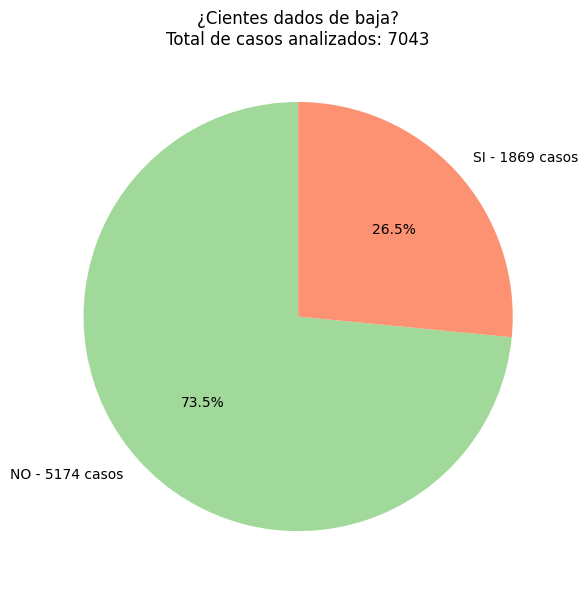

In [102]:
graficar_pie_binario(df, 'baja_cliente', '¿Cientes dados de baja?')

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

In [103]:
# Función para mostrar la distribución de baja por categoría con conteos y porcentajes
def churn_por_categoria(columna):
    # Cantidades absolutas
    conteo_absoluto = pd.crosstab(df[columna], df['baja_cliente'])

    # Porcentajes
    tabla_pct = pd.crosstab(df[columna], df['baja_cliente'], normalize='index') * 100
    tabla_pct = tabla_pct.round(2)
    tabla_pct.columns = ['Permanecen (%)', 'Baja (%)']

    # Renombrar columnas absolutas
    conteo_absoluto.columns = ['Nº Permanecen', 'Nº Baja']

    # Total de registros por categoría
    cantidad = df[columna].value_counts().sort_index()

    # Combinar columnas
    tabla_final = pd.concat([conteo_absoluto, tabla_pct], axis=1)
    tabla_final['Cantidad'] = cantidad

    # Reordenar columnas
    tabla_final = tabla_final[['Cantidad', 'Nº Permanecen', 'Permanecen (%)', 'Nº Baja', 'Baja (%)']]

    display(tabla_final)

# Lista de variables categóricas a analizar
categoricas = [
    'cliente_genero', 'tipo_contrato', 'metodo_pago',
    'factura_online', 'cli_tiene_pareja', 'cli_mayor_65', 'cl_tiene_hijos'
]

# Aplicar la función a cada variable categórica
for col in categoricas:
    print(f"\n📊 Distribución de baja por: {col}")
    churn_por_categoria(col)


📊 Distribución de baja por: cliente_genero


,Cantidad,Nº Permanecen,Permanecen (%),Nº Baja,Baja (%)
cliente_genero,,,,,
femenino,3488,2549,73.08,939,26.92
masculino,3555,2625,73.84,930,26.16



📊 Distribución de baja por: tipo_contrato


,Cantidad,Nº Permanecen,Permanecen (%),Nº Baja,Baja (%)
tipo_contrato,,,,,
month-to-month,3875,2220,57.29,1655,42.71
one year,1473,1307,88.73,166,11.27
two year,1695,1647,97.17,48,2.83



📊 Distribución de baja por: metodo_pago


,Cantidad,Nº Permanecen,Permanecen (%),Nº Baja,Baja (%)
metodo_pago,,,,,
bank transfer (automatic),1544,1286,83.29,258,16.71
credit card (automatic),1522,1290,84.76,232,15.24
electronic check,2365,1294,54.71,1071,45.29
mailed check,1612,1304,80.89,308,19.11



📊 Distribución de baja por: factura_online


,Cantidad,Nº Permanecen,Permanecen (%),Nº Baja,Baja (%)
factura_online,,,,,
0,2872,2403,83.67,469,16.33
1,4171,2771,66.43,1400,33.57



📊 Distribución de baja por: cli_tiene_pareja


,Cantidad,Nº Permanecen,Permanecen (%),Nº Baja,Baja (%)
cli_tiene_pareja,,,,,
0,3641,2441,67.04,1200,32.96
1,3402,2733,80.34,669,19.66



📊 Distribución de baja por: cli_mayor_65


,Cantidad,Nº Permanecen,Permanecen (%),Nº Baja,Baja (%)
cli_mayor_65,,,,,
0,5901,4508,76.39,1393,23.61
1,1142,666,58.32,476,41.68



📊 Distribución de baja por: cl_tiene_hijos


,Cantidad,Nº Permanecen,Permanecen (%),Nº Baja,Baja (%)
cl_tiene_hijos,,,,,
0,4933,3390,68.72,1543,31.28
1,2110,1784,84.55,326,15.45


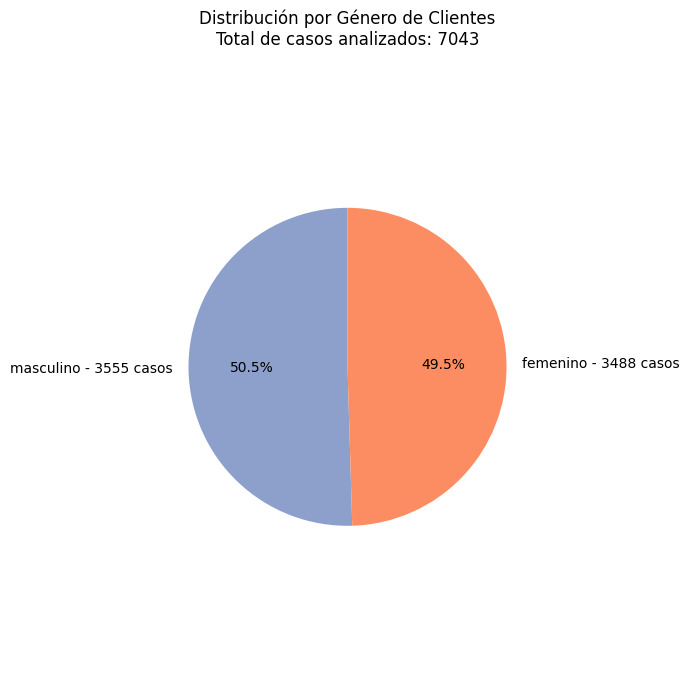

In [104]:
import matplotlib.pyplot as plt

# Conteo de género
valores = df['cliente_genero'].value_counts()
etiquetas = valores.index.tolist()  # ['Femenino', 'Masculino']
total = valores.sum()

# Etiquetas personalizadas
etiquetas_con_valores = [
    f'{label} - {valores[label]} casos' for label in etiquetas
]

# Gráfico
plt.figure(figsize=(7, 7))
plt.pie(
    valores,
    labels=etiquetas_con_valores,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#8da0cb', '#fc8d62']
)
plt.title(f'Distribución por Género de Clientes\nTotal de casos analizados: {total}')
plt.axis('equal')  # Círculo perfecto
plt.tight_layout()
plt.show()

,Cantidad,Porcentaje (%)
cliente_genero,,
femenino,939,50.24
masculino,930,49.76
,Cantidad,Porcentaje (%)
cliente_genero,,
masculino,2625,50.73
femenino,2549,49.27


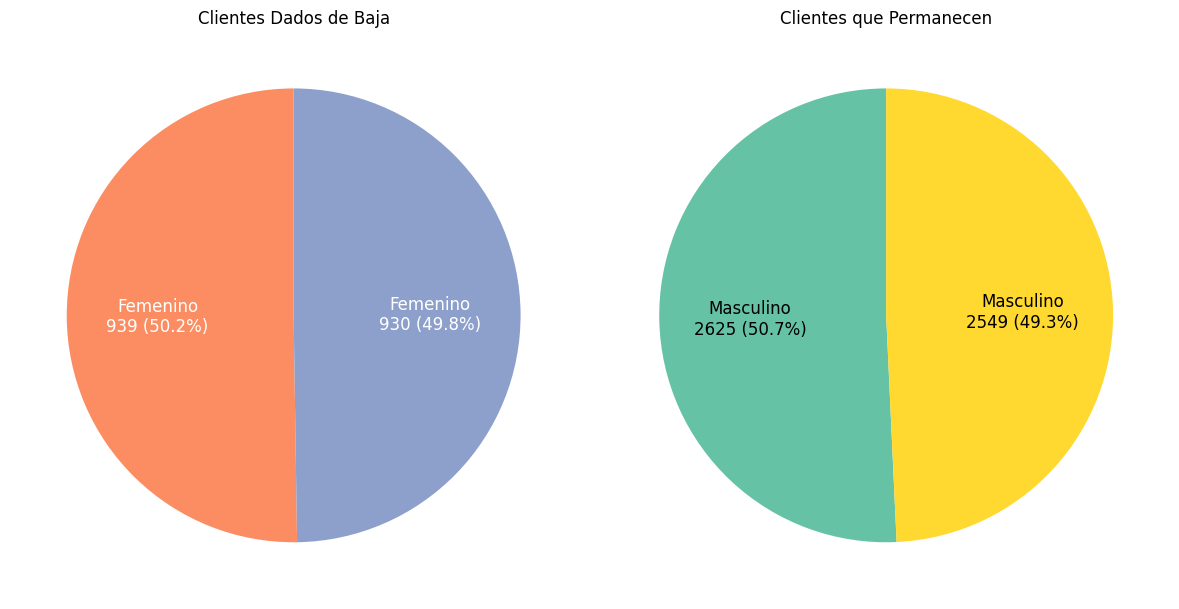

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Normalizar valores de cliente_genero
df['cliente_genero'] = df['cliente_genero'].str.lower().str.strip()

# Separar clientes
baja = df[df['baja_cliente'] == 1]
perm = df[df['baja_cliente'] == 0]

# Conteo y porcentaje
baja_genero = baja['cliente_genero'].value_counts()
perm_genero = perm['cliente_genero'].value_counts()

baja_pct = baja_genero / baja_genero.sum() * 100
perm_pct = perm_genero / perm_genero.sum() * 100

# Crear DataFrames resumen
tabla_baja = pd.DataFrame({
    'Cantidad': baja_genero,
    'Porcentaje (%)': baja_pct.round(2)
})

tabla_perm = pd.DataFrame({
    'Cantidad': perm_genero,
    'Porcentaje (%)': perm_pct.round(2)
})

# Mostrar tablas lado a lado
html = f"""
<div style="display: flex; gap: 50px;">
   <div>

  </div>
  <div>
    <h4 style='text-align:center;'>📌 Baja (baja_cliente = 1)</h4>
    {tabla_baja.to_html(index=True)}
  </div>
  <div>
    <h4 style='text-align:center;'>📌 Permanece (baja_cliente = 0)</h4>
    {tabla_perm.to_html(index=True)}
  </div>
</div>
"""
display(HTML(html))

# Función personalizada para autopct
def autopct_personalizado(valores, etiquetas):
    def formatear(pct):
        total = sum(valores)
        idx = int(round(pct / 100.0 * len(valores))) - 1
        valor = int(round(pct * total / 100.0))
        etiqueta = etiquetas[idx] if idx < len(etiquetas) else ""
        return f"{etiqueta}\n{valor} ({pct:.1f}%)"
    return formatear

# Datos y etiquetas
etiquetas_baja = baja_genero.index.str.capitalize()
etiquetas_perm = perm_genero.index.str.capitalize()

# Colores
colores_baja = ['#fc8d62', '#8da0cb']
colores_perm = ['#66c2a5', '#ffd92f']

# Gráficos en paralelo
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 1: Clientes dados de baja
axs[0].pie(
    baja_genero,
    labels=None,
    autopct=autopct_personalizado(baja_genero.values, etiquetas_baja),
    startangle=90,
    colors=colores_baja,
    textprops={'fontsize': 12, 'color': 'white'}
)
axs[0].set_title('Clientes Dados de Baja')

# Gráfico 2: Clientes que permanecen
axs[1].pie(
    perm_genero,
    labels=None,
    autopct=autopct_personalizado(perm_genero.values, etiquetas_perm),
    startangle=90,
    colors=colores_perm,
    textprops={'fontsize': 12, 'color': 'black'}
)
axs[1].set_title('Clientes que Permanecen')

plt.tight_layout()
plt.show()


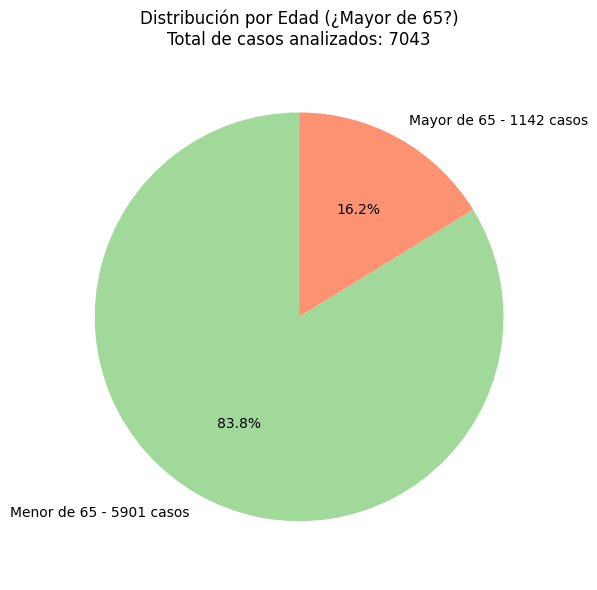

In [106]:
import matplotlib.pyplot as plt

# Conteo de valores
valores = df['cli_mayor_65'].value_counts()
total = valores.sum()

# Mapear etiquetas
etiquetas_dict = {0: 'Menor de 65', 1: 'Mayor de 65'}
etiquetas = [f'{etiquetas_dict[i]} - {valores[i]} casos' for i in valores.index]

# Gráfico
plt.figure(figsize=(6, 6))
plt.pie(
    valores,
    labels=etiquetas,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#a1d99b', '#fc9272']
)
plt.title(f'Distribución por Edad (¿Mayor de 65?)\nTotal de casos analizados: {total}')
plt.axis('equal')  # Círculo perfecto
plt.tight_layout()
plt.show()

In [107]:
import matplotlib.pyplot as plt
import numpy as np

def graficar_churn_barras_agrupadas(df, variable, ordenar_por=None):
    """
    Gráfico de barras agrupadas mostrando % de permanencia y baja por categoría.

    Parámetros:
    - df: DataFrame con columnas 'baja_cliente' y la variable categórica
    - variable: str, nombre de la variable categórica
    - ordenar_por: str, 'baja' (por % baja), 'total' (por cantidad), o None (sin ordenar)
    """

    # Filtrar datos válidos
    df_filtrado = df.dropna(subset=[variable, 'baja_cliente'])

    # Agrupar y calcular
    agrupado = df_filtrado.groupby(variable)['baja_cliente']
    baja_pct = agrupado.mean() * 100
    perm_pct = 100 - baja_pct
    conteo_total = agrupado.count()
    n_baja = agrupado.sum().astype(int)
    n_perm = (conteo_total - n_baja).astype(int)

    # Unificar en un DataFrame para ordenar
    tabla = (
        pd.DataFrame({
            'Baja (%)': baja_pct,
            'Permanece (%)': perm_pct,
            'Total': conteo_total,
            'N° Baja': n_baja,
            'N° Perm': n_perm
        })
    )

    # Ordenar si se solicita
    if ordenar_por == 'baja':
        tabla = tabla.sort_values(by='Baja (%)', ascending=False)
    elif ordenar_por == 'total':
        tabla = tabla.sort_values(by='Total', ascending=False)

    # Preparar valores para gráfico
    categorias = tabla.index.tolist()
    x = np.arange(len(categorias))
    width = 0.35
    total_clientes = conteo_total.sum()

    # Crear gráfico
    fig, ax = plt.subplots(figsize=(9, 4.5))

    # Barras
    ax.bar(x - width/2, tabla['Permanece (%)'], width, label='Permanecen (%)', color='seagreen')
    ax.bar(x + width/2, tabla['Baja (%)'], width, label='Baja (%)', color='indianred')

    # Títulos y etiquetas
    ax.set_title(f'Distribución de Baja vs Permanencia por {variable.replace("_", " ").capitalize()}', fontsize=12, pad=10)
    ax.text(0, 105, f'Total de clientes analizados: {total_clientes}', fontsize=9, ha='left')

    ax.set_ylabel('Porcentaje (%)')
    ax.set_xticks(x)
    ax.set_xticklabels(categorias, rotation=0)
    ax.set_ylim(0, 115)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.4)

    # Etiquetas sobre las barras
    for i, cat in enumerate(categorias):
        # Permanecen
        ax.text(x[i] - width/2, tabla.loc[cat, 'Permanece (%)'] + 1,
                f"{tabla.loc[cat, 'Permanece (%)']:.1f}%", ha='center', fontsize=8)
        ax.text(x[i] - width/2, tabla.loc[cat, 'Permanece (%)'] + 7,
                f"{tabla.loc[cat, 'N° Perm']} casos", ha='center', fontsize=8, color='gray')

        # Baja
        ax.text(x[i] + width/2, tabla.loc[cat, 'Baja (%)'] + 1,
                f"{tabla.loc[cat, 'Baja (%)']:.1f}%", ha='center', fontsize=8)
        ax.text(x[i] + width/2, tabla.loc[cat, 'Baja (%)'] + 7,
                f"{tabla.loc[cat, 'N° Baja']} casos", ha='center', fontsize=8, color='gray')

    # Ajustar márgenes
    plt.subplots_adjust(top=0.85, bottom=0.15)
    plt.show()

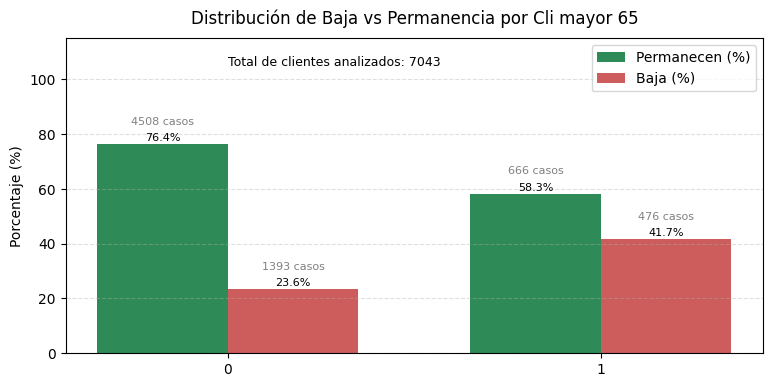

In [108]:
graficar_churn_barras_agrupadas(df, 'cli_mayor_65')

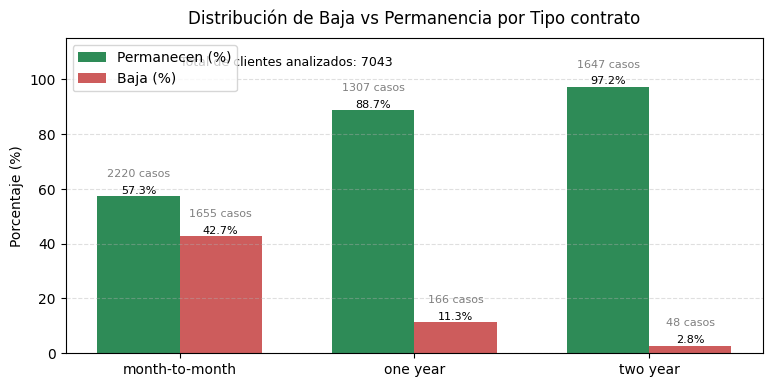

In [109]:
graficar_churn_barras_agrupadas(df, 'tipo_contrato')

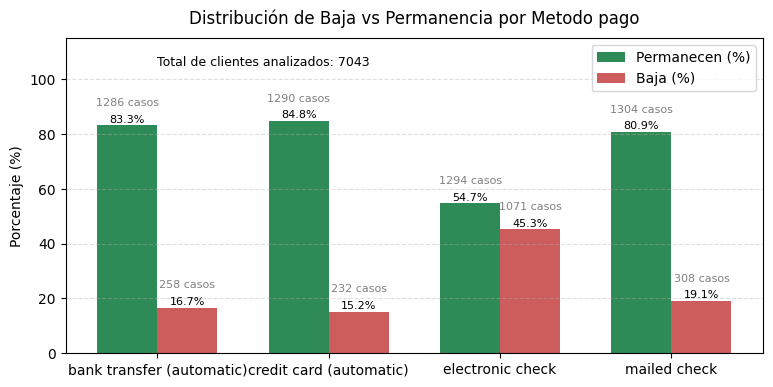

In [110]:

graficar_churn_barras_agrupadas(df, 'metodo_pago')

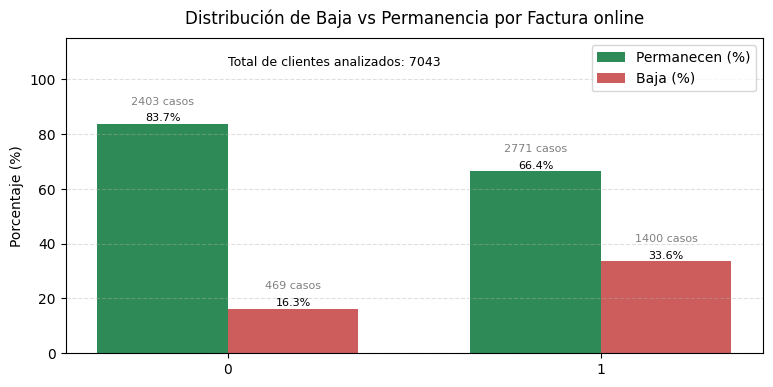

In [111]:

graficar_churn_barras_agrupadas(df, 'factura_online')

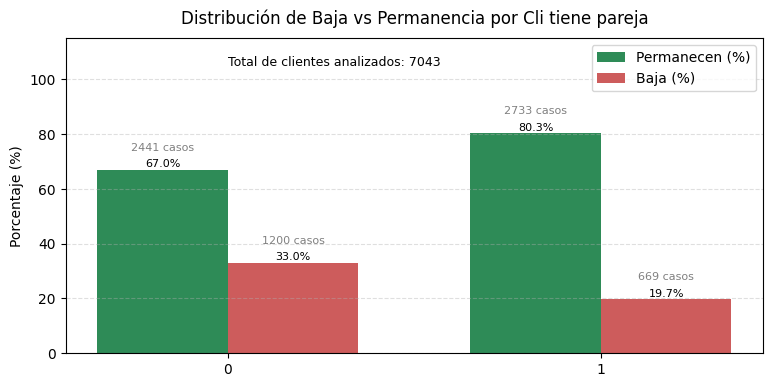

In [112]:
graficar_churn_barras_agrupadas(df, 'cli_tiene_pareja')

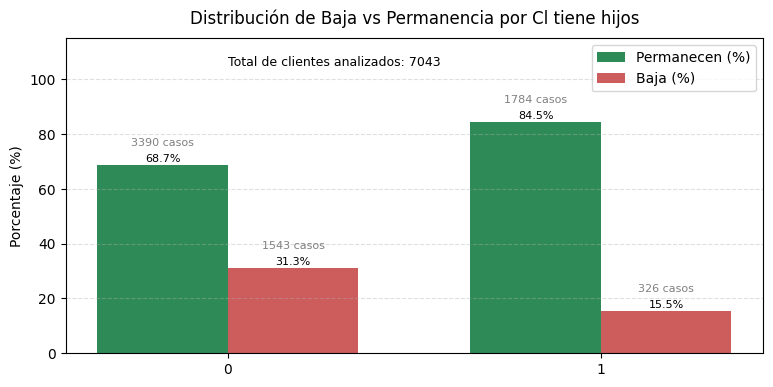

In [113]:
graficar_churn_barras_agrupadas(df, 'cl_tiene_hijos')

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

def graficar_baja_vs_perm(df, variable):
    """
    Gráficos compactos: % de baja vs % de permanencia por una variable categórica.
    """

    # Filtrar nulos en la variable
    df_filtrado = df.dropna(subset=[variable])

    # Calcular % de baja y % de permanencia
    baja_pct = df_filtrado.groupby(variable)['baja_cliente'].mean() * 100
    perm_pct = 100 - baja_pct

    # Crear figura más pequeña
    fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

    # --- Gráfico 1: % Baja ---
    sns.barplot(
        x=baja_pct.index,
        y=baja_pct.values,
        color='salmon',  # Usamos color en lugar de palette
        ax=axs[0]
    )
    axs[0].set_title(f'% de Clientes Dados de Baja por {variable}', fontsize=11)
    axs[0].set_ylabel('Porcentaje (%)', fontsize=10)
    axs[0].set_xlabel(variable.replace('_', ' ').capitalize(), fontsize=10)
    axs[0].set_ylim(0, 100)
    axs[0].tick_params(axis='x', rotation=30, labelsize=9)
    axs[0].tick_params(axis='y', labelsize=9)

    for bar in axs[0].patches:
        height = bar.get_height()
        axs[0].text(
            bar.get_x() + bar.get_width() / 2,
            height + 1,
            f'{height:.1f}%',
            ha='center',
            va='bottom',
            fontsize=8
        )

    # --- Gráfico 2: % Permanece ---
    sns.barplot(
        x=perm_pct.index,
        y=perm_pct.values,
        color='mediumseagreen',
        ax=axs[1]
    )
    axs[1].set_title(f'% de Clientes que Permanecen por {variable}', fontsize=11)
    axs[1].set_ylabel('', fontsize=10)
    axs[1].set_xlabel(variable.replace('_', ' ').capitalize(), fontsize=10)
    axs[1].set_ylim(0, 100)
    axs[1].tick_params(axis='x', rotation=30, labelsize=9)
    axs[1].tick_params(axis='y', labelsize=9)




    for bar in axs[1].patches:
        height = bar.get_height()
        axs[1].text(
            bar.get_x() + bar.get_width() / 2,
            height + 1,
            f'{height:.1f}%',
            ha='center',
            va='bottom',
            fontsize=8
        )

    plt.tight_layout()
    plt.show()
    return None

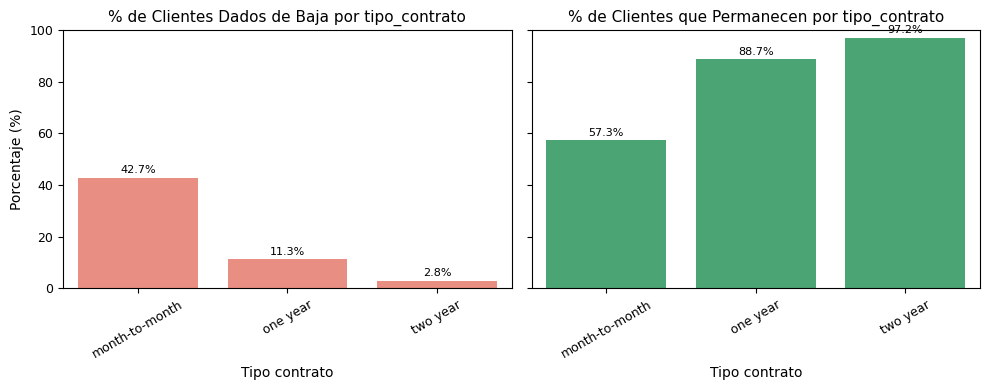

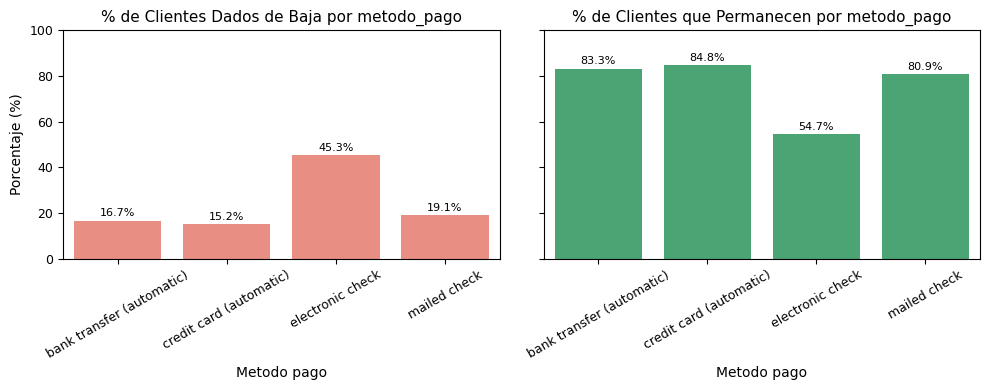

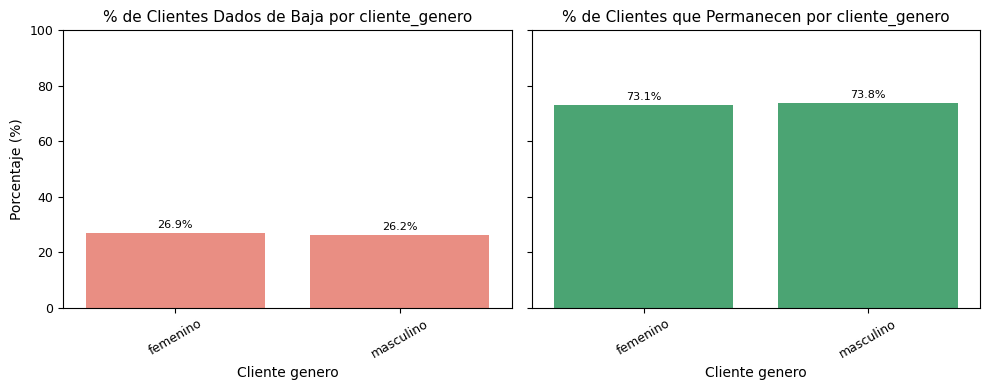

In [115]:
graficar_baja_vs_perm(df, 'tipo_contrato')
graficar_baja_vs_perm(df, 'metodo_pago')
graficar_baja_vs_perm(df, 'cliente_genero')

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

def graficar_baja_vs_perm(df, variable):
    """
    Gráficos compactos: % de baja vs % de permanencia por una variable categórica.
    """

    df_filtrado = df.dropna(subset=[variable])

    baja_pct = df_filtrado.groupby(variable)['baja_cliente'].mean() * 100
    perm_pct = 100 - baja_pct

    fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

    # --- Gráfico 1: % Baja ---
    sns.barplot(
        x=baja_pct.index,
        y=baja_pct.values,
        color='salmon',
        ax=axs[0]
    )
    axs[0].set_title(f'% de Clientes Dados de Baja por {variable}', fontsize=11)
    axs[0].set_ylabel('Porcentaje (%)', fontsize=10)
    axs[0].set_xlabel(variable.replace('_', ' ').capitalize(), fontsize=10)
    axs[0].set_ylim(0, 100)
    axs[0].tick_params(axis='x', rotation=0, labelsize=9)
    axs[0].tick_params(axis='y', labelsize=9)

    for i, bar in enumerate(axs[0].patches):
        height = bar.get_height()
        label_x = bar.get_x() + bar.get_width() / 2
        valor = baja_pct.index[i]
        etiqueta = "Sí" if valor == 0 else "No"
        axs[0].text(label_x, height - 10, etiqueta, ha='center', va='center', color='white', fontsize=10, fontweight='bold')
        axs[0].text(label_x, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

    # --- Gráfico 2: % Permanece ---
    sns.barplot(
        x=perm_pct.index,
        y=perm_pct.values,
        color='mediumseagreen',
        ax=axs[1]
    )
    axs[1].set_title(f'% de Clientes que Permanecen por {variable}', fontsize=11)
    axs[1].set_ylabel('', fontsize=10)
    axs[1].set_xlabel(variable.replace('_', ' ').capitalize(), fontsize=10)
    axs[1].set_ylim(0, 100)
    axs[1].tick_params(axis='x', rotation=0, labelsize=9)
    axs[1].tick_params(axis='y', labelsize=9)

    for i, bar in enumerate(axs[1].patches):
        height = bar.get_height()
        label_x = bar.get_x() + bar.get_width() / 2
        valor = perm_pct.index[i]
        etiqueta = "Sí" if valor == 0 else "No"
        axs[1].text(label_x, height - 10, etiqueta, ha='center', va='center', color='white', fontsize=10, fontweight='bold')
        axs[1].text(label_x, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()

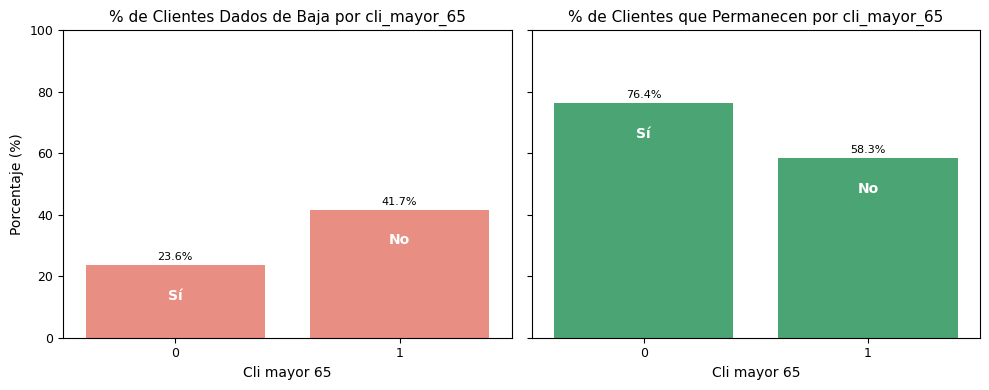

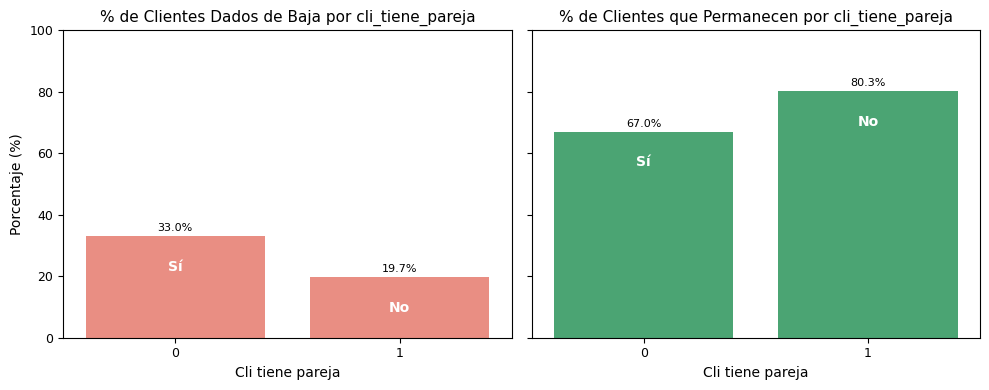

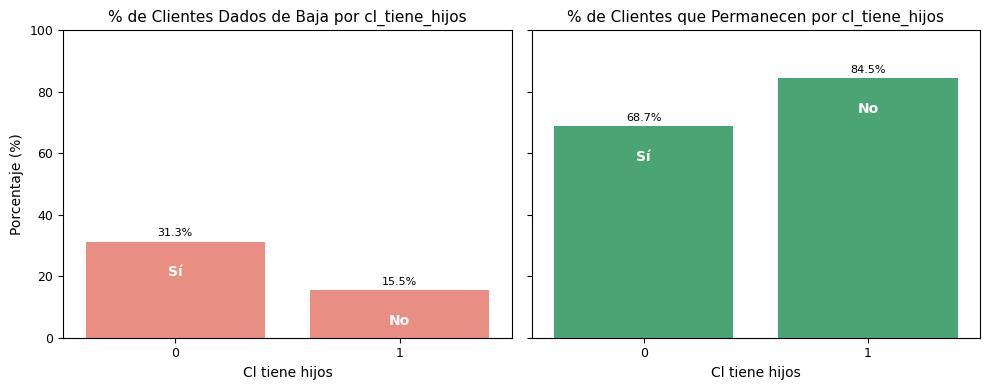

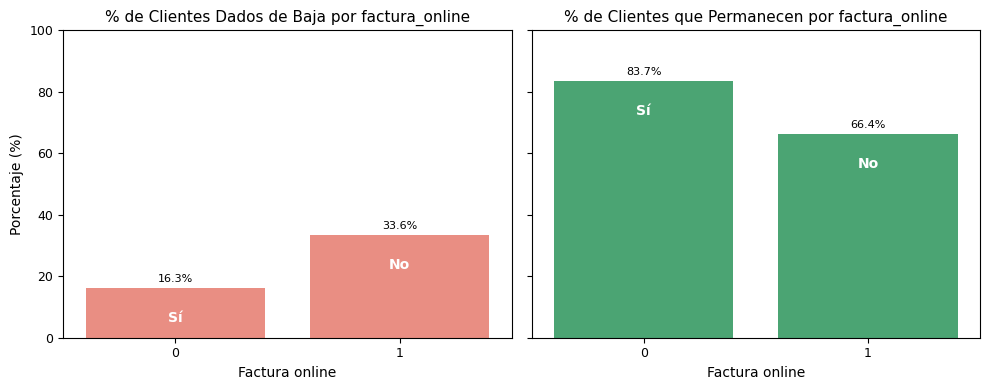

In [117]:
graficar_baja_vs_perm(df, 'cli_mayor_65')
graficar_baja_vs_perm(df, 'cli_tiene_pareja')
graficar_baja_vs_perm(df, 'cl_tiene_hijos')
graficar_baja_vs_perm(df, 'factura_online')

In [120]:
import matplotlib.pyplot as plt

def graficar_lineas_baja_vs_perm(df, variable):
    """
    Gráfico de líneas compacto que compara % de baja y % de permanencia por categoría.
    """

    # Eliminar nulos
    df_filtrado = df.dropna(subset=[variable])

    # Calcular % de baja y permanencia
    baja_pct = df_filtrado.groupby(variable)['baja_cliente'].mean() * 100
    perm_pct = 100 - baja_pct

    categorias = baja_pct.index.tolist()
    x = range(len(categorias))

    # Gráfico más compacto
    plt.figure(figsize=(7, 4))  # Tamaño reducido

    # Línea % Baja
    plt.plot(x, baja_pct.values, marker='o', color='red', label='% Baja', linewidth=2)
    # Línea % Permanece
    plt.plot(x, perm_pct.values, marker='o', color='green', label='% Permanece', linewidth=2)

    # Etiquetas sobre los puntos
    for i, (b, p) in enumerate(zip(baja_pct.values, perm_pct.values)):
        plt.text(x[i], b + 1.5, f'{b:.1f}%', color='red', ha='center', fontsize=8)
        plt.text(x[i], p + 1.5, f'{p:.1f}%', color='green', ha='center', fontsize=8)

    plt.xticks(ticks=x, labels=categorias, rotation=0, fontsize=9)
    plt.yticks(fontsize=9)
    plt.ylabel('Porcentaje (%)', fontsize=10)
    plt.title(f'% Baja vs % Permanece por {variable.replace("_", " ").capitalize()}', fontsize=11)
    plt.ylim(0, 110)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend(fontsize=9)
    plt.tight_layout()
    plt.show()

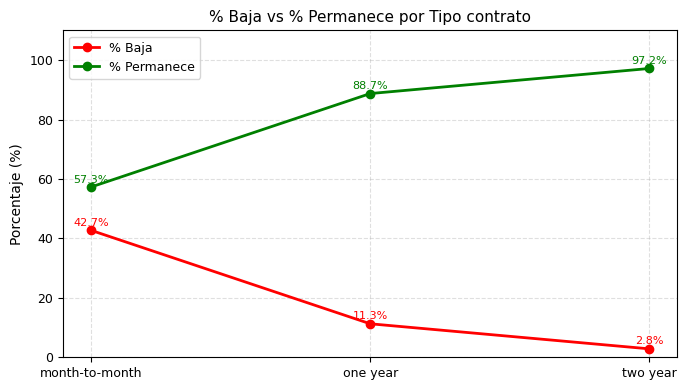

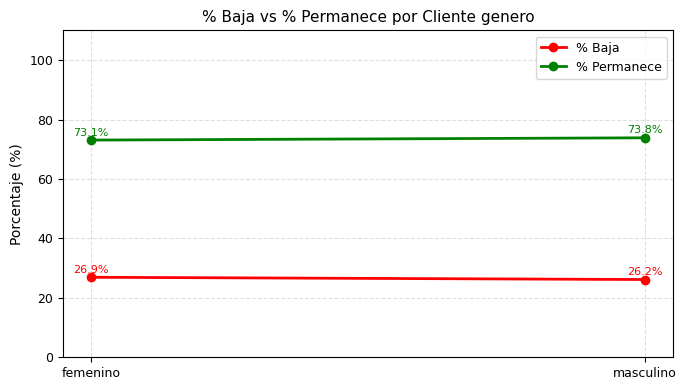

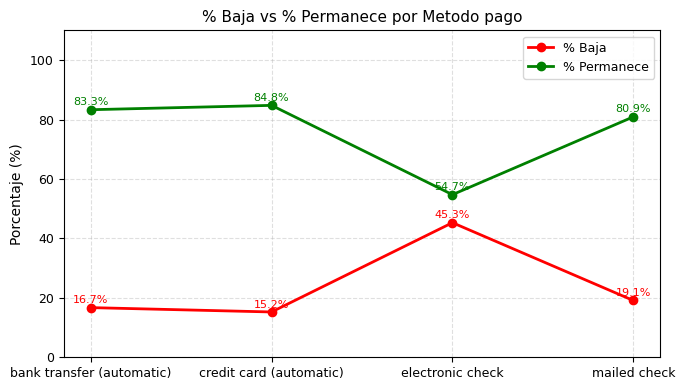

In [121]:
graficar_lineas_baja_vs_perm(df, 'tipo_contrato')
graficar_lineas_baja_vs_perm(df, 'cliente_genero')
graficar_lineas_baja_vs_perm(df, 'metodo_pago')

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

def graficar_distribucion_numericas(df, variables):
    """
    Gráficos de distribución para variables numéricas,
    separados por evasión (baja_cliente = 0 o 1).
    """
    for var in variables:
        plt.figure(figsize=(8, 4))
        sns.kdeplot(data=df, x=var, hue='baja_cliente', fill=True, common_norm=False, palette='Set2')
        plt.title(f'Distribución de {var.replace("_", " ").capitalize()} según Evasión')
        plt.xlabel(var.replace("_", " ").capitalize())
        plt.ylabel('Densidad')
        plt.legend(title='Baja cliente', labels=['No (0)', 'Sí (1)'])
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

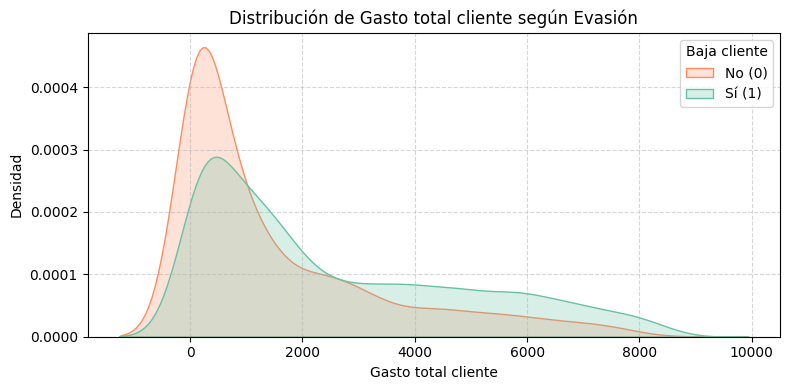

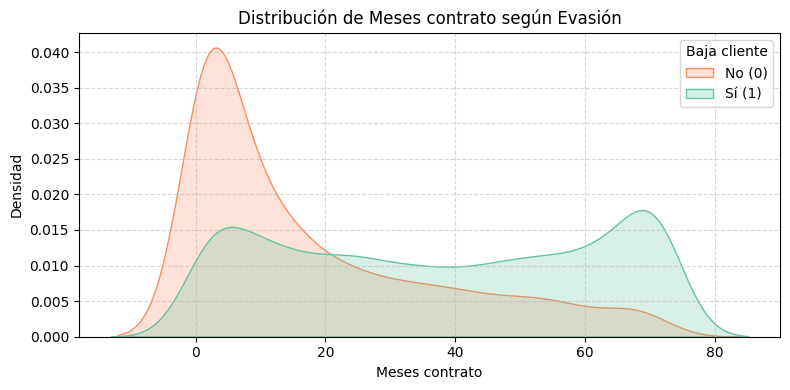

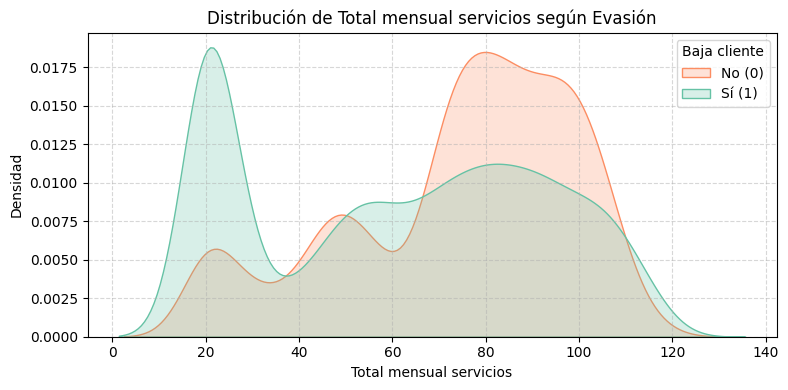

In [123]:
variables_numericas = ['gasto_total_cliente', 'meses_contrato', 'total_mensual_servicios']
graficar_distribucion_numericas(df, variables_numericas)

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def graficar_distribucion_y_boxplots_con_estadisticas(df, variables):
    """
    Para cada variable numérica:
    - Muestra distribución (KDE) y boxplot por baja_cliente
    - Imprime tabla estadística (media, mediana, etc.) para cada grupo
    """
    for var in variables:
        # Estadísticas descriptivas por grupo
        estadisticas = df.groupby('baja_cliente')[var].agg(
            Media='mean',
            Mediana='median',
            Desvío_std='std',
            Mínimo='min',
            Máximo='max',
            Conteo='count'
        ).round(2)

        print(f'\n Estadísticas para: {var}')
        display(estadisticas)

        # Gráficos
        fig, axs = plt.subplots(1, 2, figsize=(12, 4.5))

        # KDE
        sns.kdeplot(
            data=df,
            x=var,
            hue='baja_cliente',
            fill=True,
            common_norm=False,
            palette='Set2',
            ax=axs[0]
        )
        axs[0].set_title(f'Distribución de {var.replace("_", " ").capitalize()}')
        axs[0].set_xlabel(var.replace("_", " ").capitalize())
        axs[0].set_ylabel('Densidad')
        axs[0].legend(title='Baja cliente', labels=['No (0)', 'Sí (1)'])
        axs[0].grid(True, linestyle='--', alpha=0.5)

        # Boxplot
        sns.boxplot(
            data=df,
            x='baja_cliente',
            y=var,
            palette='Set2',
            ax=axs[1]
        )
        axs[1].set_title(f'Boxplot de {var.replace("_", " ").capitalize()} por Baja')
        axs[1].set_xlabel('Baja cliente (0 = No, 1 = Sí)')
        axs[1].set_ylabel(var.replace("_", " ").capitalize())
        axs[1].grid(True, linestyle='--', alpha=0.5)

        plt.tight_layout()
        plt.show()


 Estadísticas para: gasto_total_cliente


,Media,Mediana,Desvío_std,Mínimo,Máximo,Conteo
baja_cliente,,,,,,
0,2549.91,1679.52,2329.95,0.00,8672.45,5174
1,1531.80,703.55,1890.82,18.85,8684.80,1869


/tmp/ipython-input-124-3317874158.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


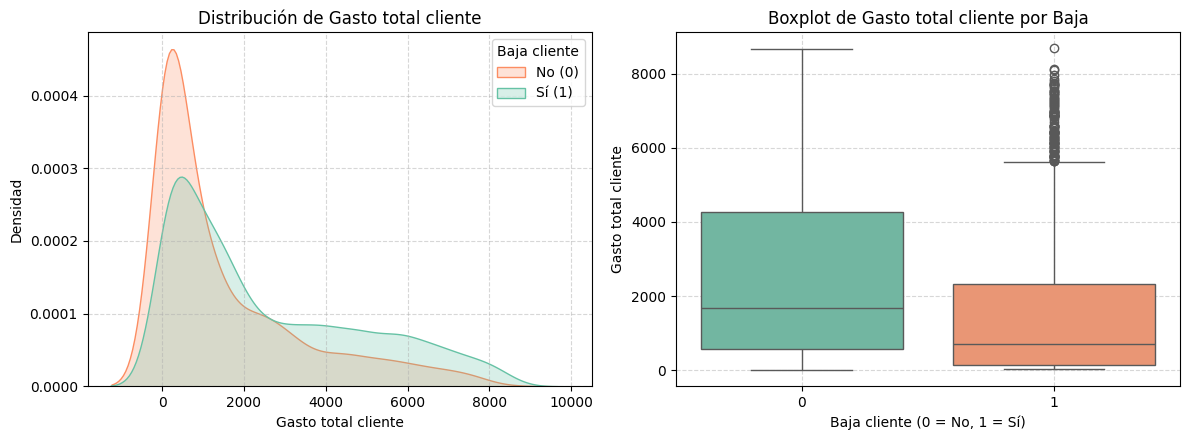


 Estadísticas para: meses_contrato


,Media,Mediana,Desvío_std,Mínimo,Máximo,Conteo
baja_cliente,,,,,,
0,37.57,38.0,24.11,0,72,5174
1,17.98,10.0,19.53,1,72,1869


/tmp/ipython-input-124-3317874158.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


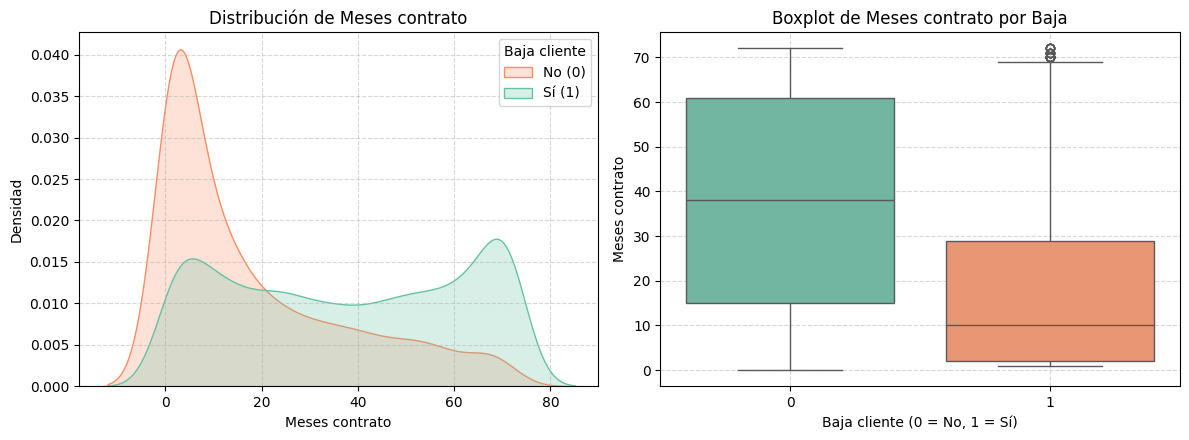


 Estadísticas para: total_mensual_servicios


,Media,Mediana,Desvío_std,Mínimo,Máximo,Conteo
baja_cliente,,,,,,
0,61.27,64.43,31.09,18.25,118.75,5174
1,74.44,79.65,24.67,18.85,118.35,1869


/tmp/ipython-input-124-3317874158.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


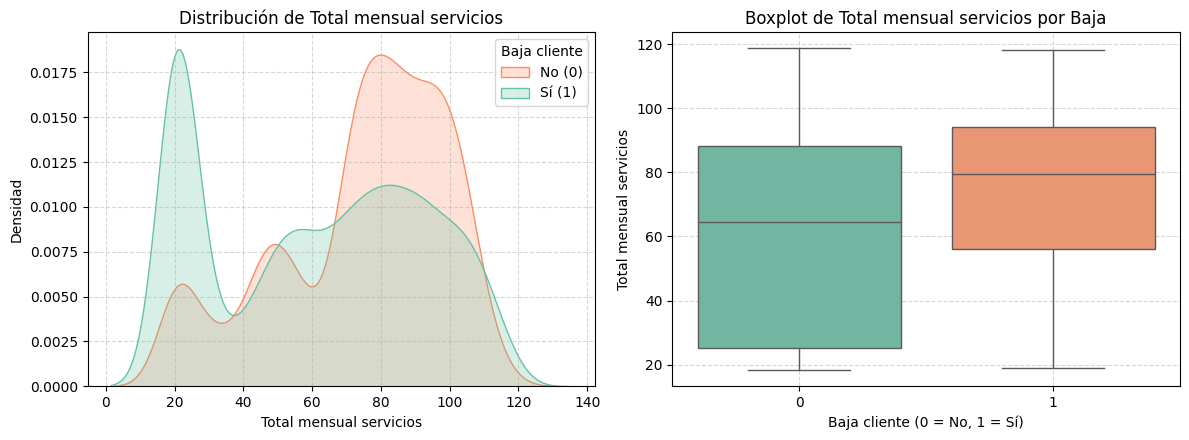

In [125]:
variables_numericas = ['gasto_total_cliente', 'meses_contrato', 'total_mensual_servicios']
graficar_distribucion_y_boxplots_con_estadisticas(df, variables_numericas)

#📄Informe final

#  Informe Final - Análisis de Evasión de Clientes (Churn)

##  Introducción

Este proyecto tiene como objetivo analizar el comportamiento de los clientes de una empresa de telecomunicaciones para identificar patrones relacionados con la evasión (churn). Comprender las causas de la baja de clientes permite diseñar estrategias de retención efectivas y mejorar la rentabilidad a largo plazo.

---

##  Limpieza y Tratamiento de Datos

Se realizó una preparación cuidadosa del dataset original que incluyó los siguientes pasos:

- Eliminación de registros con valores nulos en la variable objetivo (`baja_cliente`).
- Imputación de valores faltantes en la variable `gasto_total_cliente`, utilizando la fórmula:  
  `gasto_total_cliente = meses_contrato * total_mensual_servicios`.
- Reemplazo de valores categóricos (`yes`, `no`) por valores numéricos (`1`, `0`) para facilitar el análisis.
- Estandarización de etiquetas como género (`female` → `femenino`, `male` → `masculino`).
- Conversión de variables relevantes al tipo `int64`.
- Exportación del dataset limpio para su reutilización.

---

##  Análisis Exploratorio de Datos

Se realizaron múltiples análisis visuales y estadísticos para entender cómo se relacionan las variables con la evasión de clientes:

- **Distribución general de bajas vs. permanencia** (gráfico de torta ).
- **Relación entre churn y variables categóricas**, como género, tipo de contrato, método de pago, etc.
- **Visualizaciones con porcentajes y cantidades reales**, utilizando gráficos agrupados, dispersión y líneas.
- **Análisis de variables numéricas**, como `meses_contrato`, `gasto_total_cliente` y `total_mensual_servicios`, mediante KDE y boxplots.


---

##  Conclusiones e Insights

- Los clientes con **contratos mensuales** presentan una tasa de baja significativamente mayor.
- Aquellos que **usan facturación electrónica** también tienen una mayor propensión a cancelar el servicio.
- El tiempo de permanencia (meses de contrato) y el gasto total son variables clave:  
  **clientes que se quedan tienden a tener contratos más largos y mayor inversión total.**
- El churn no presenta diferencias significativas por género ni por si tienen hijos o pareja.
- El churn  presenta diferencias aunque no tan significativas ante las condiciones  si tienen hijos o pareja.
 -Enfocarse en el segmento de clientes mayorea a 65 años.
---

---

##  Recomendaciones

- Incentivar contratos a largo plazo con beneficios exclusivos (bonificaciones, descuentos).
- Ofrecer **opciones alternativas a la facturación electrónica**, o mejorar su experiencia de uso.
- Implementar un sistema de alertas tempranas para clientes con baja antigüedad y bajo consumo.
- Desarrollar campañas personalizadas para grupos con mayor riesgo de baja, basadas en los patrones encontrados.

---

##  Recursos Generados

-datos_tratados.csv    
- Gráficos visuales, tablas e informes intermedios incluidos en este notebook.